In [ ]:
#Take an mxl file and create a dataframe
#Dataframe should hold information about the score in the file
#Using music21, numpy, and pandas for calculations and score transformation

In [1]:
from music21 import *
import numpy
import pandas as pd

C:\Users\brian\AppData\Local\Temp\ipykernel_21000\2663513087.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Display score of mxl file

score = converter.parse("Chopin__Trois_Valses.mxl")
score2 = converter.parse("score.musicxml")
# for m in b.getElementsByClass('Measure'):
#     k = m.analyze('key')
#     print(m.number, k)

# print(b)
#b.show(fmt = 'musicxml')    

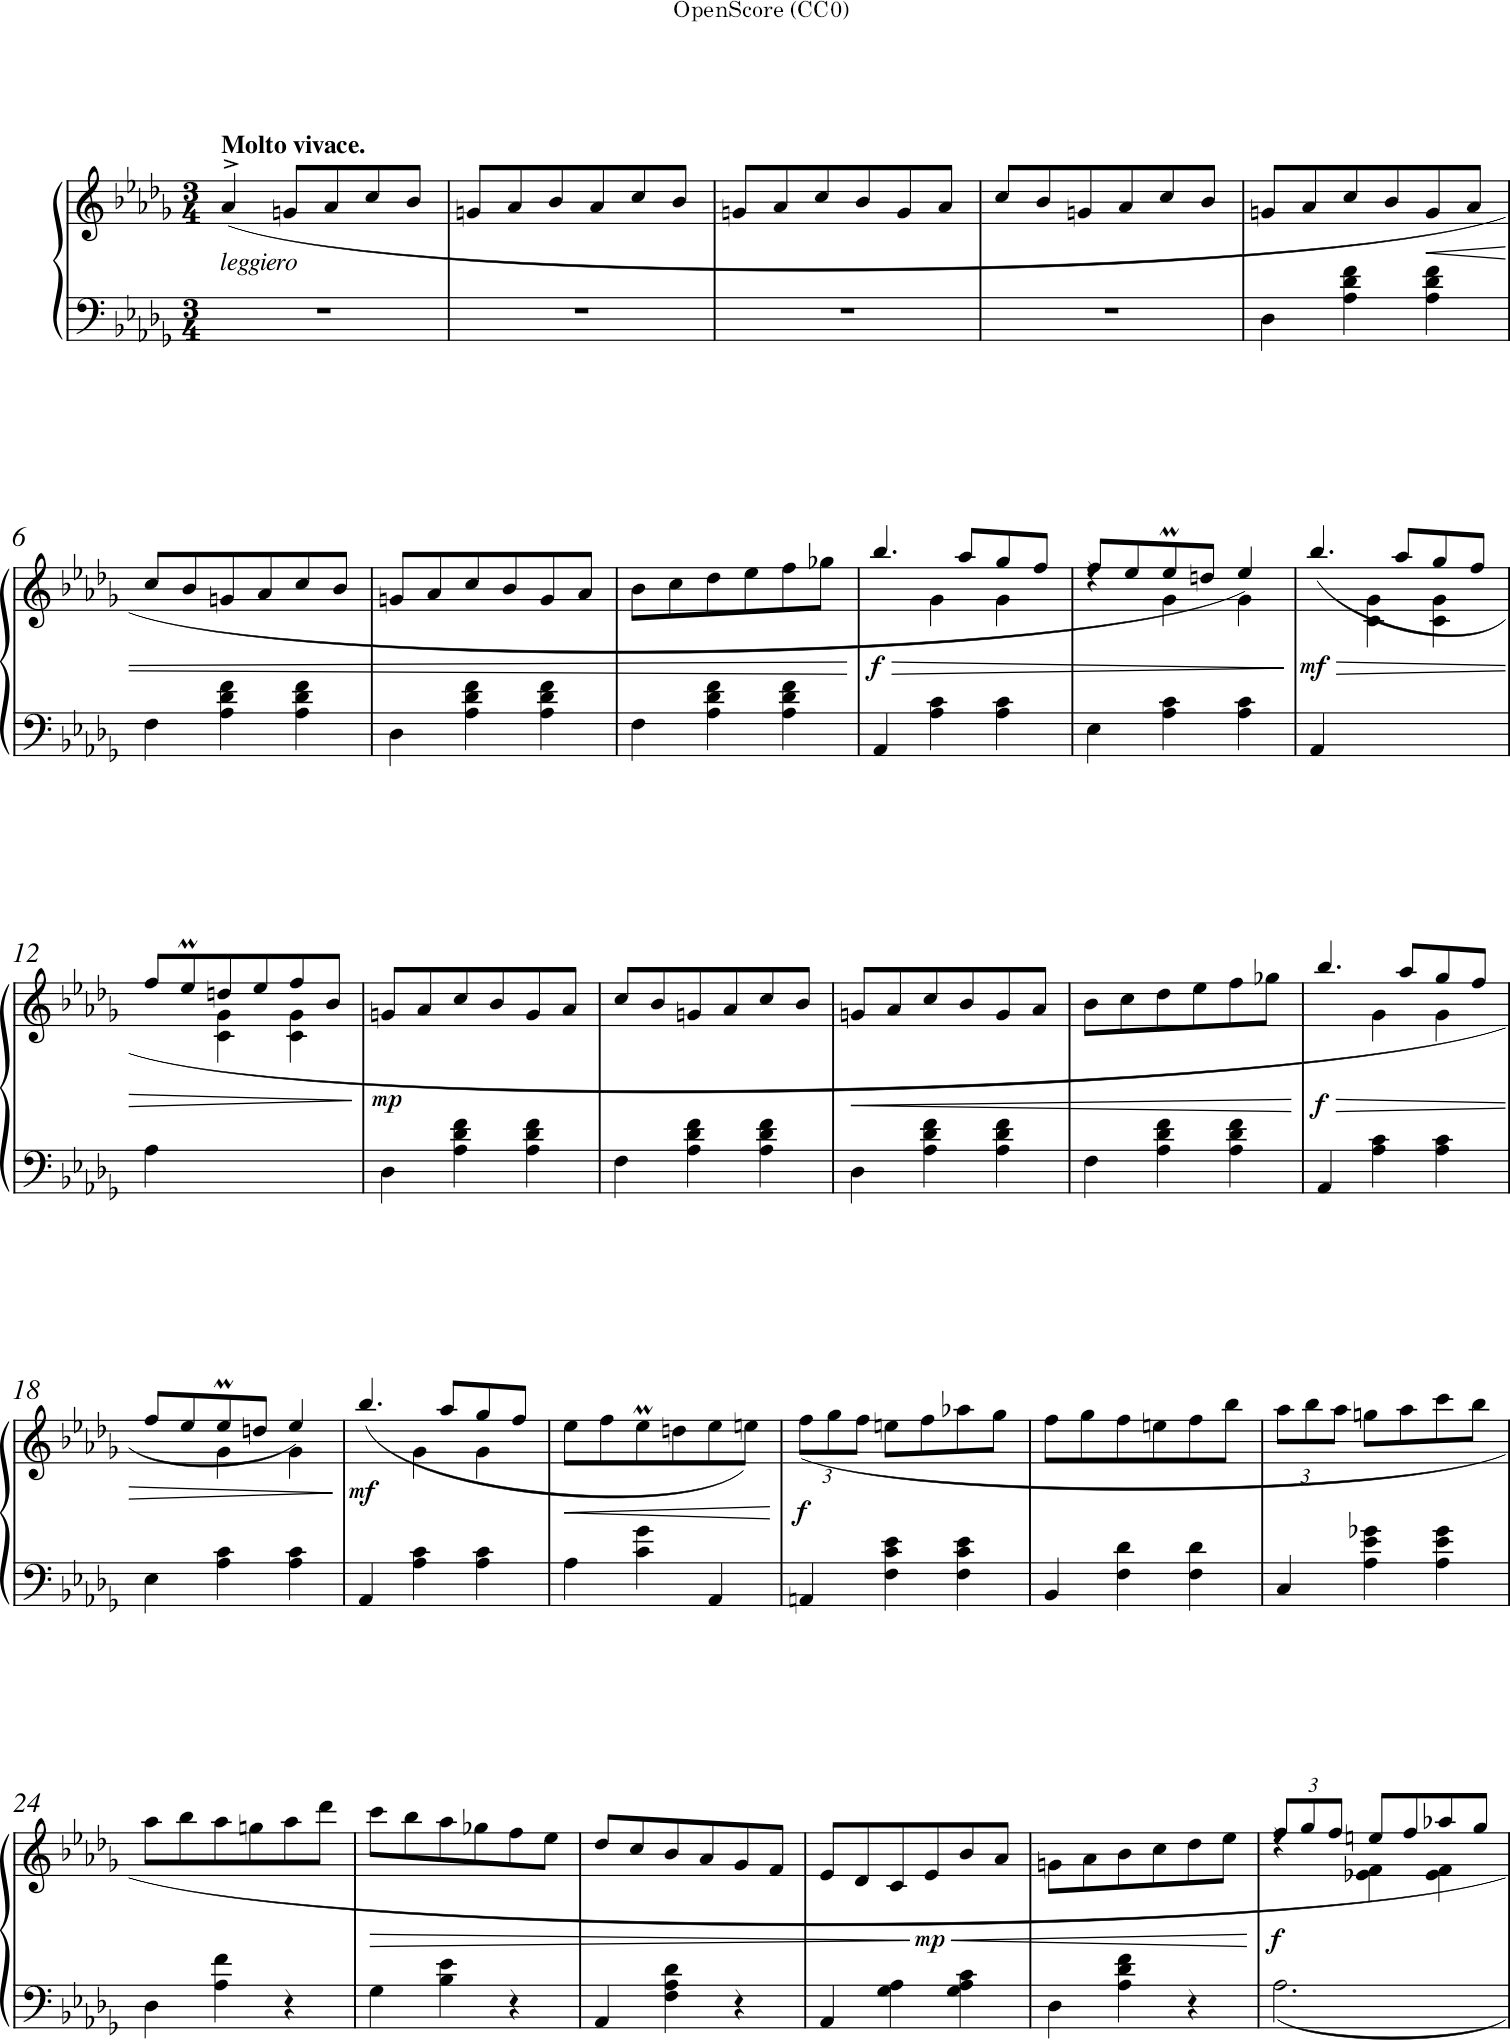

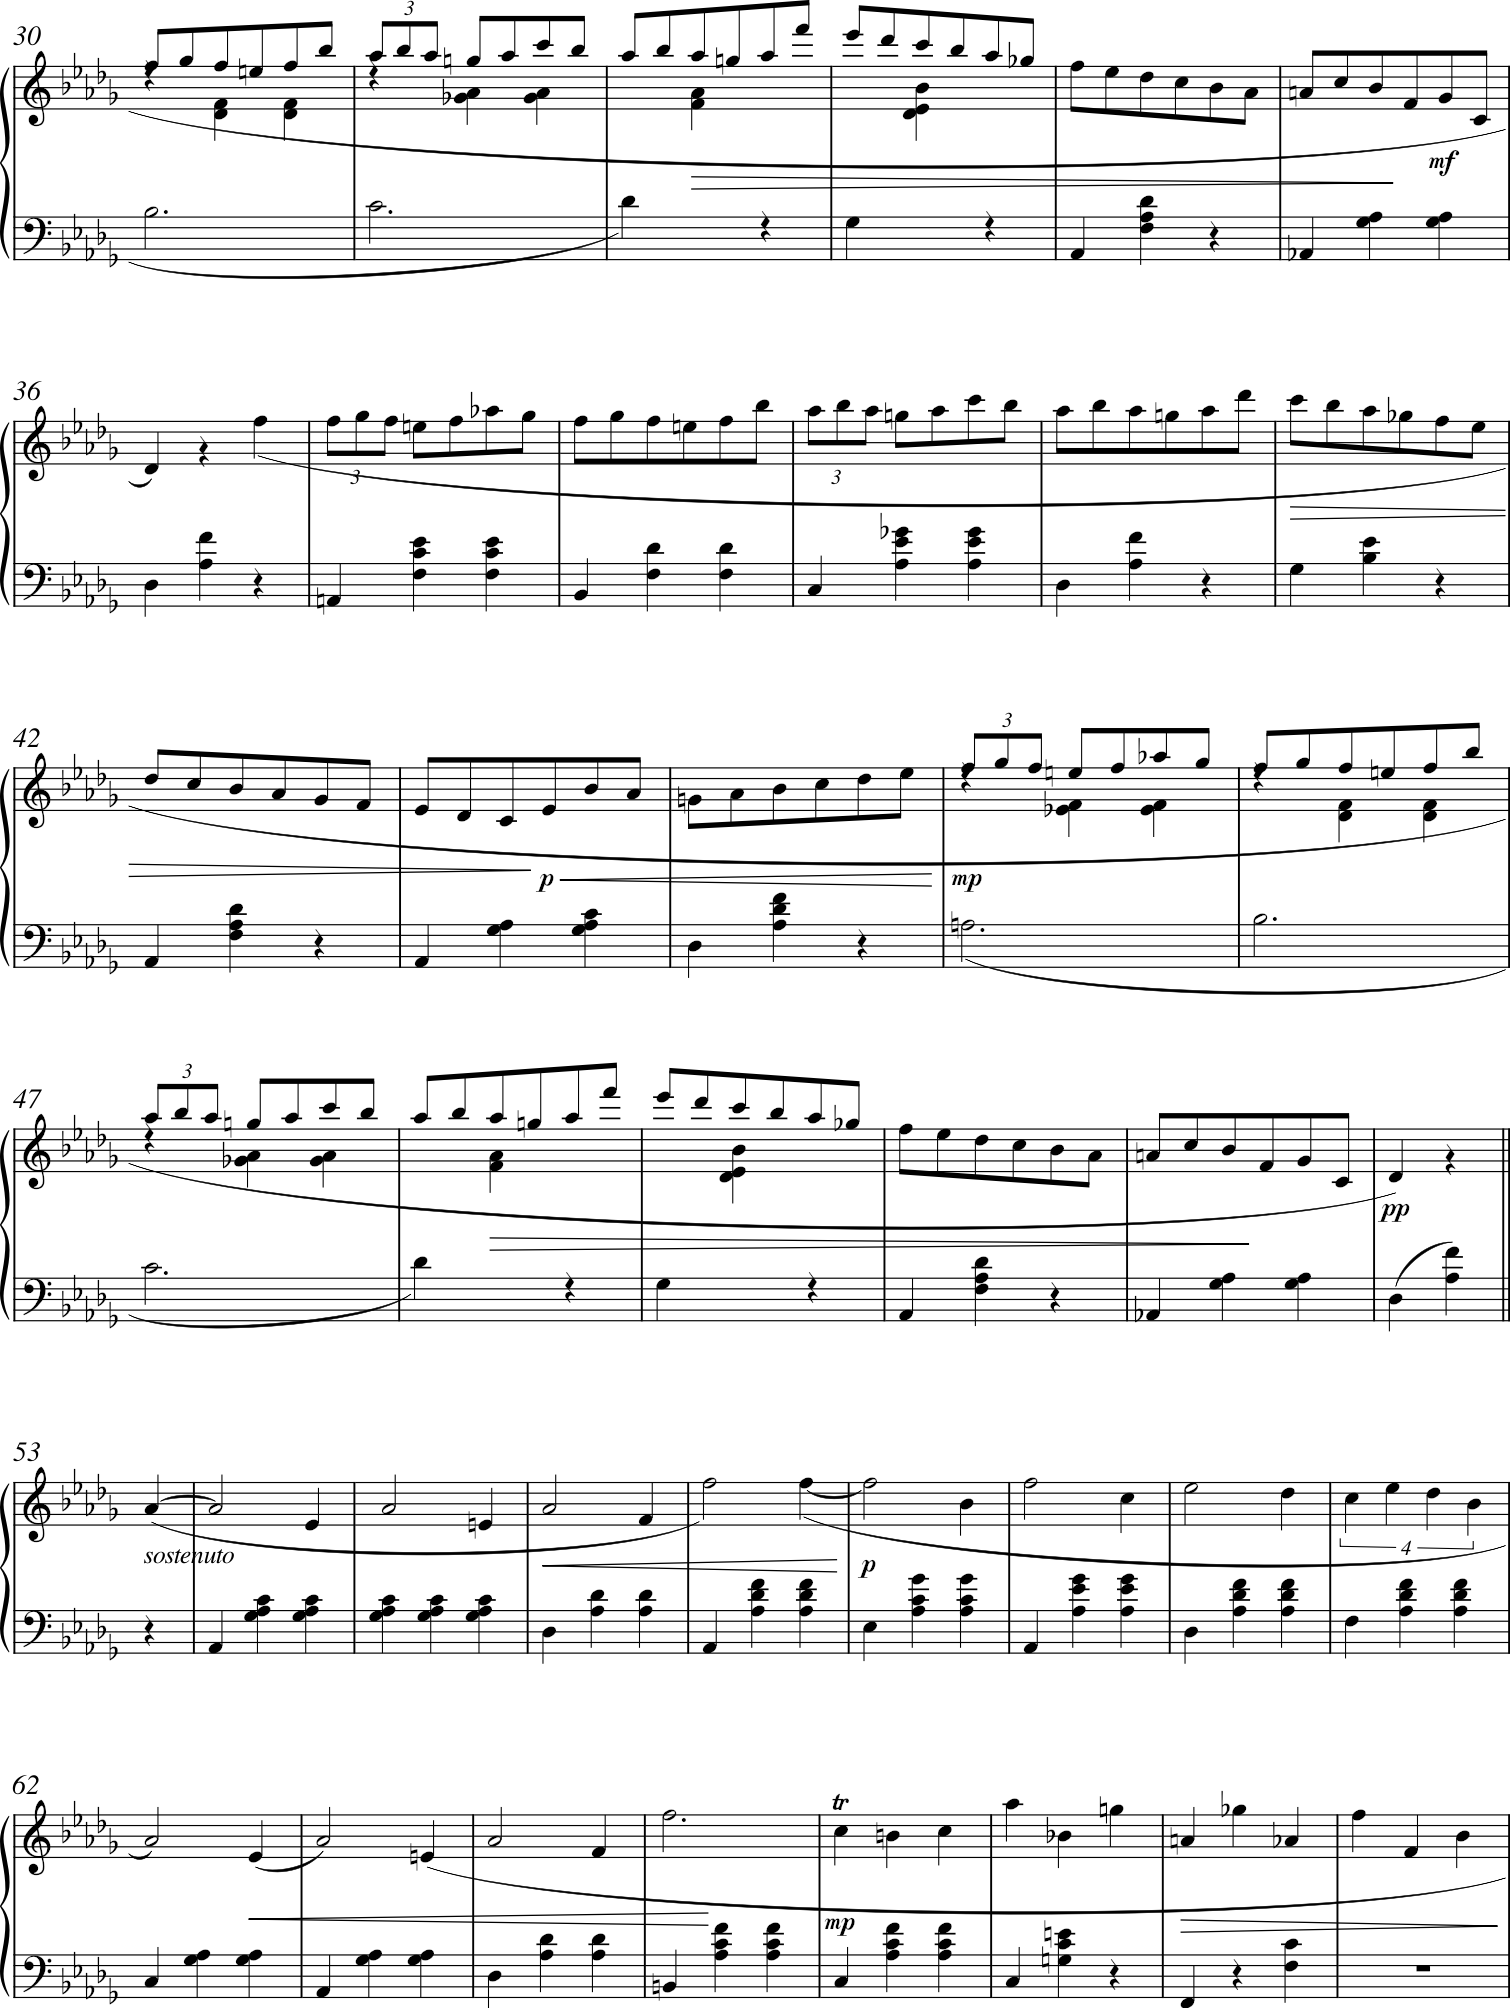

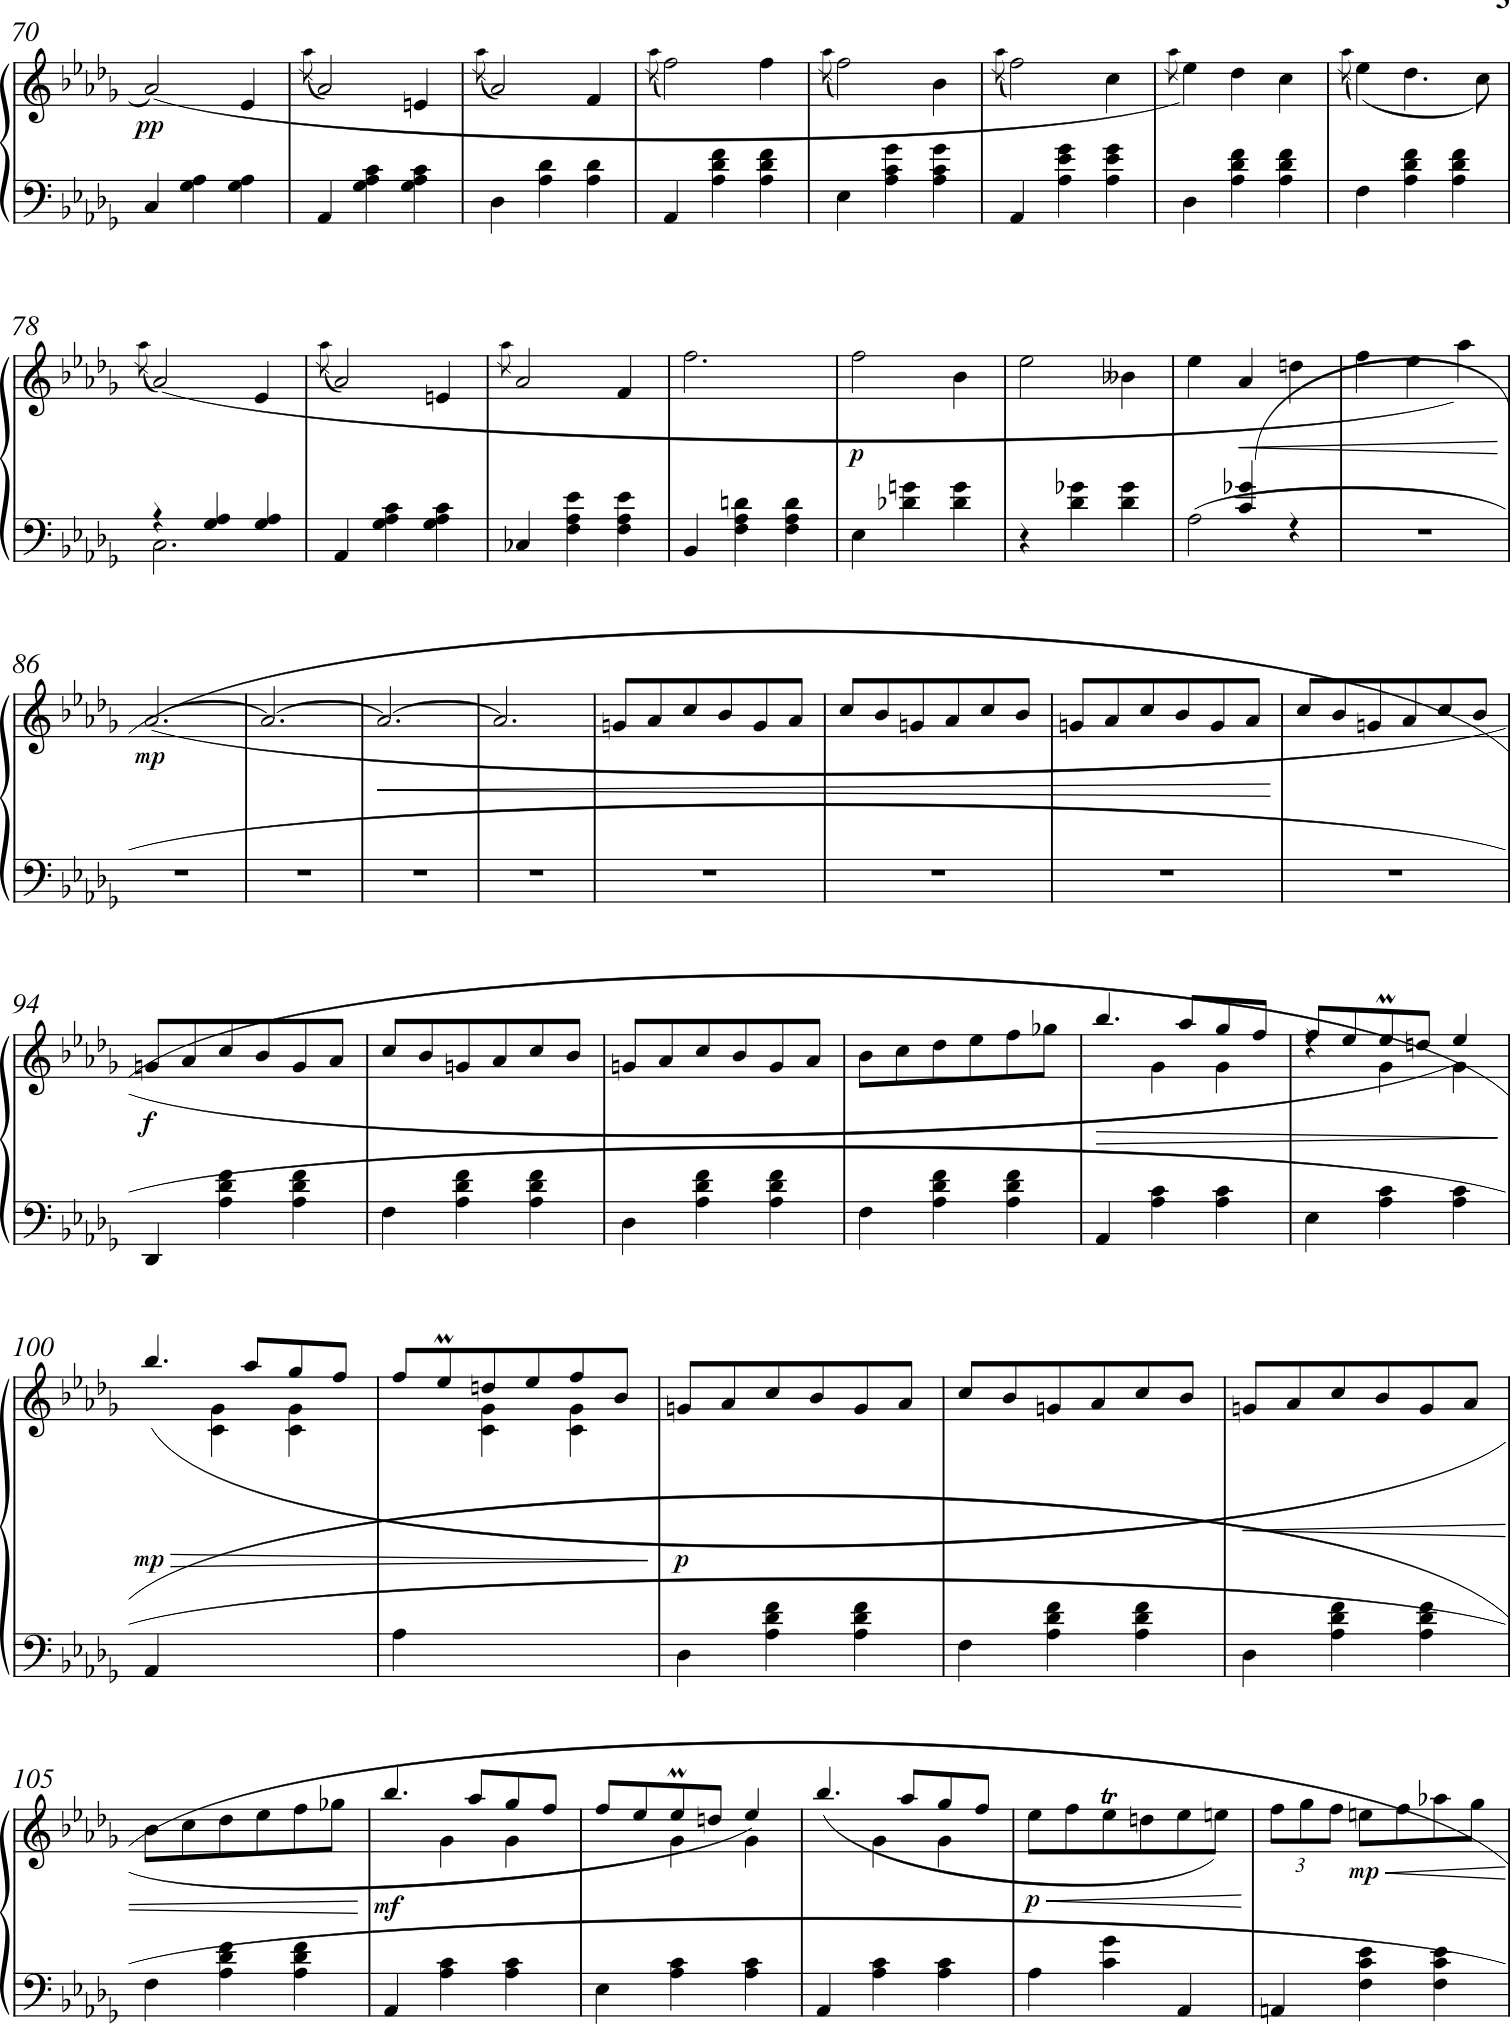

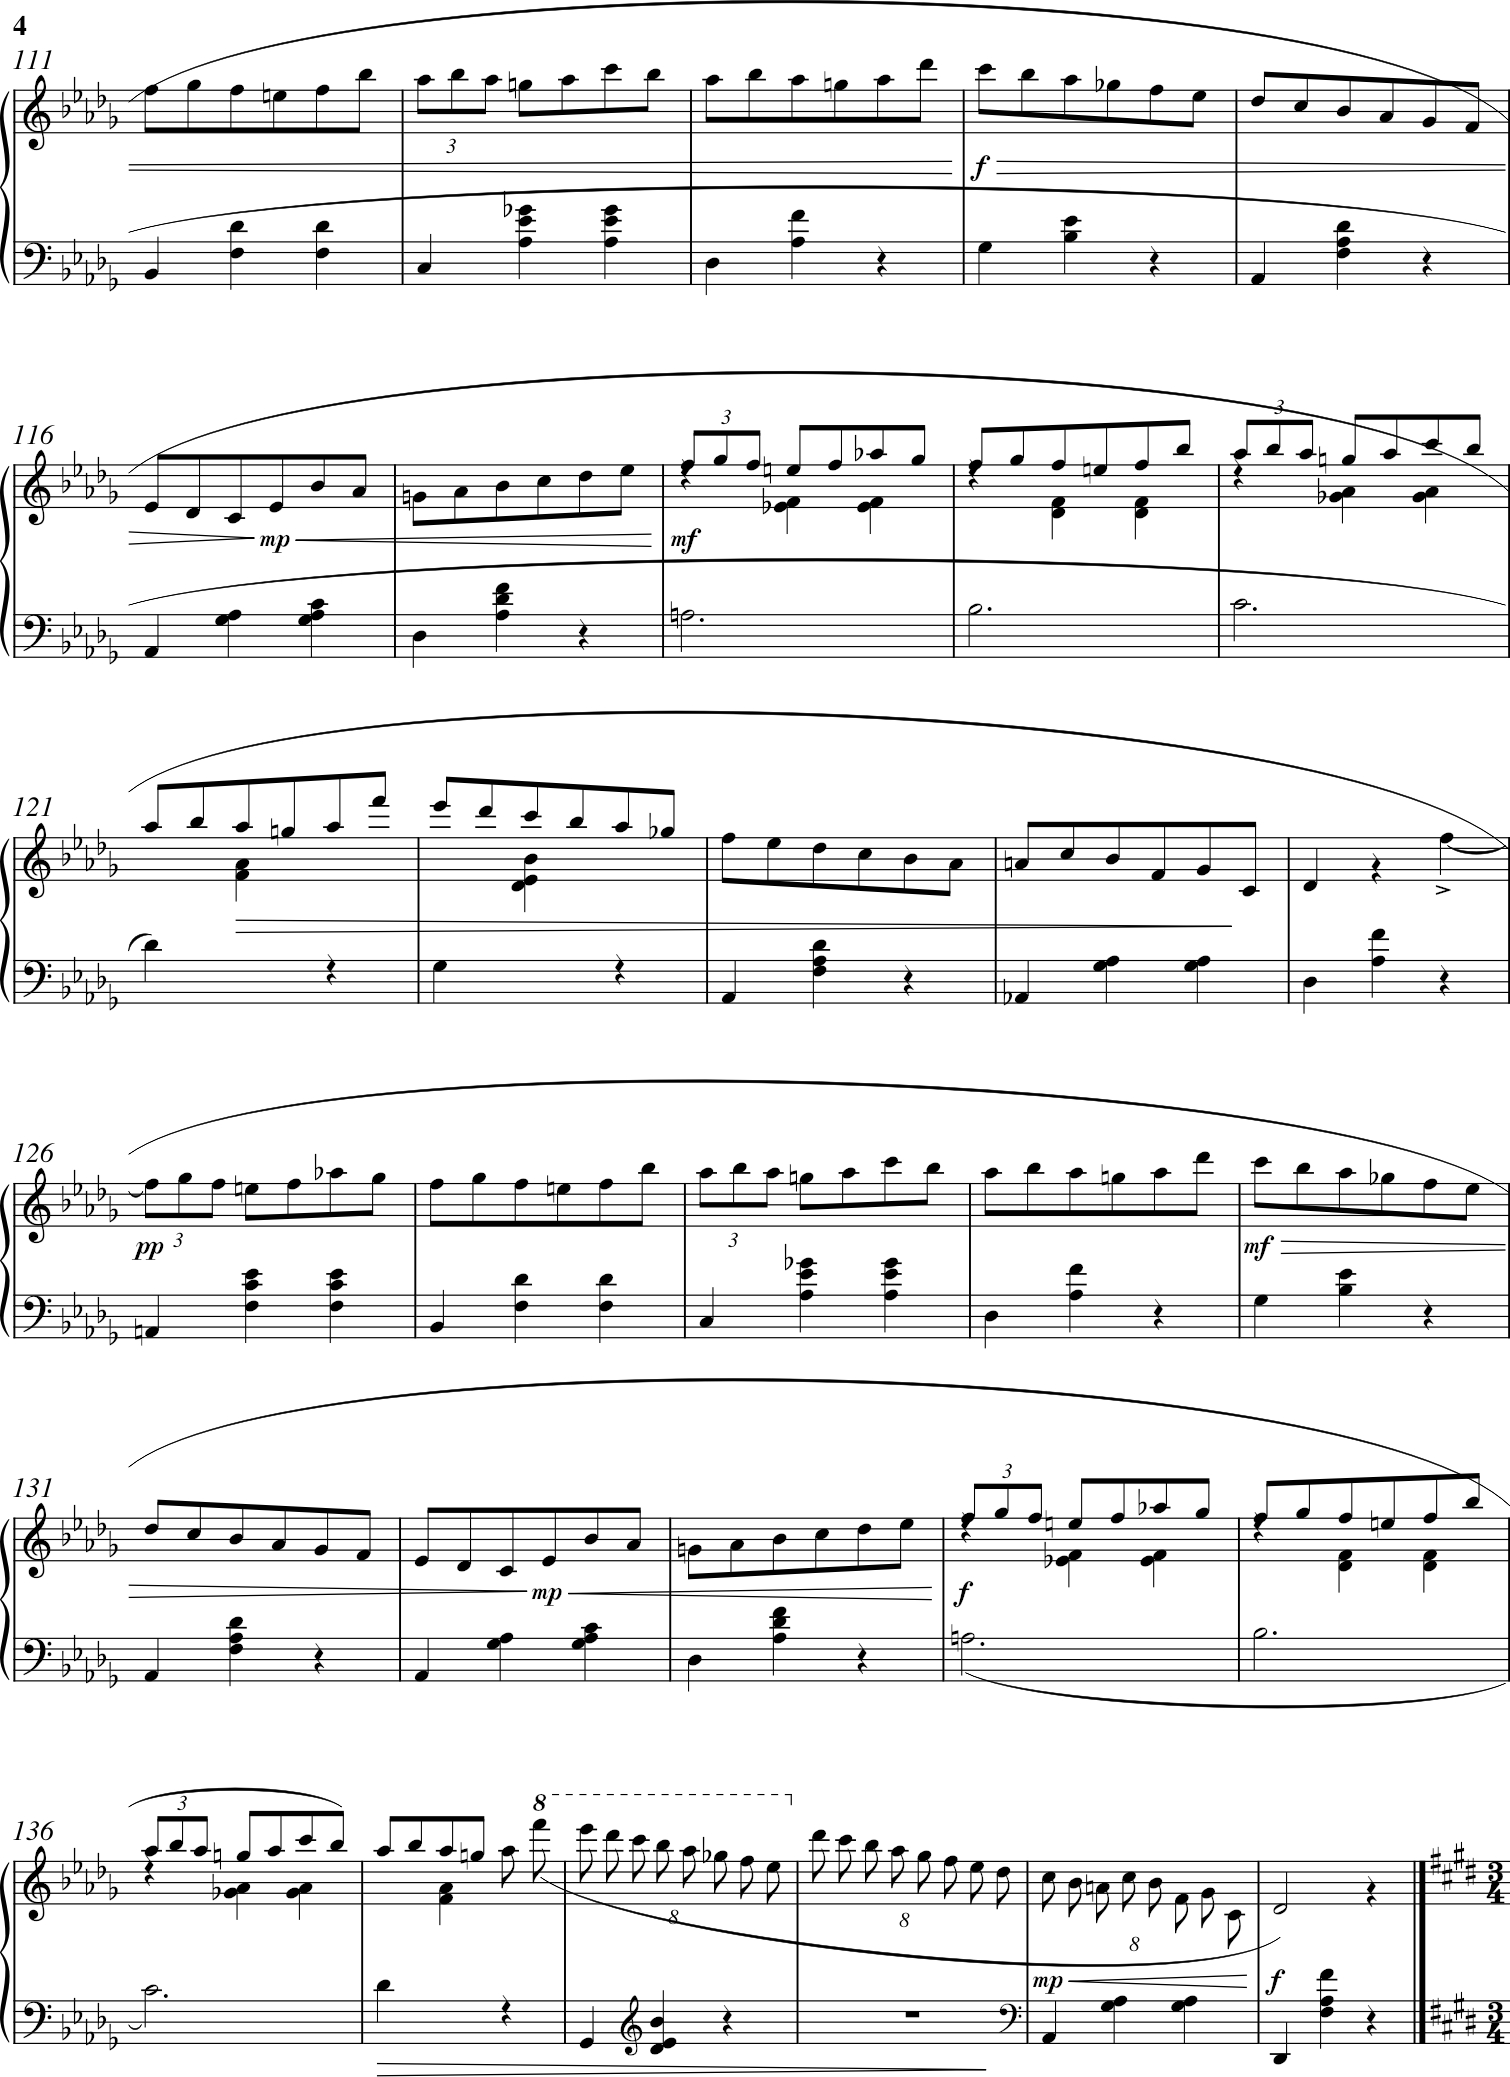

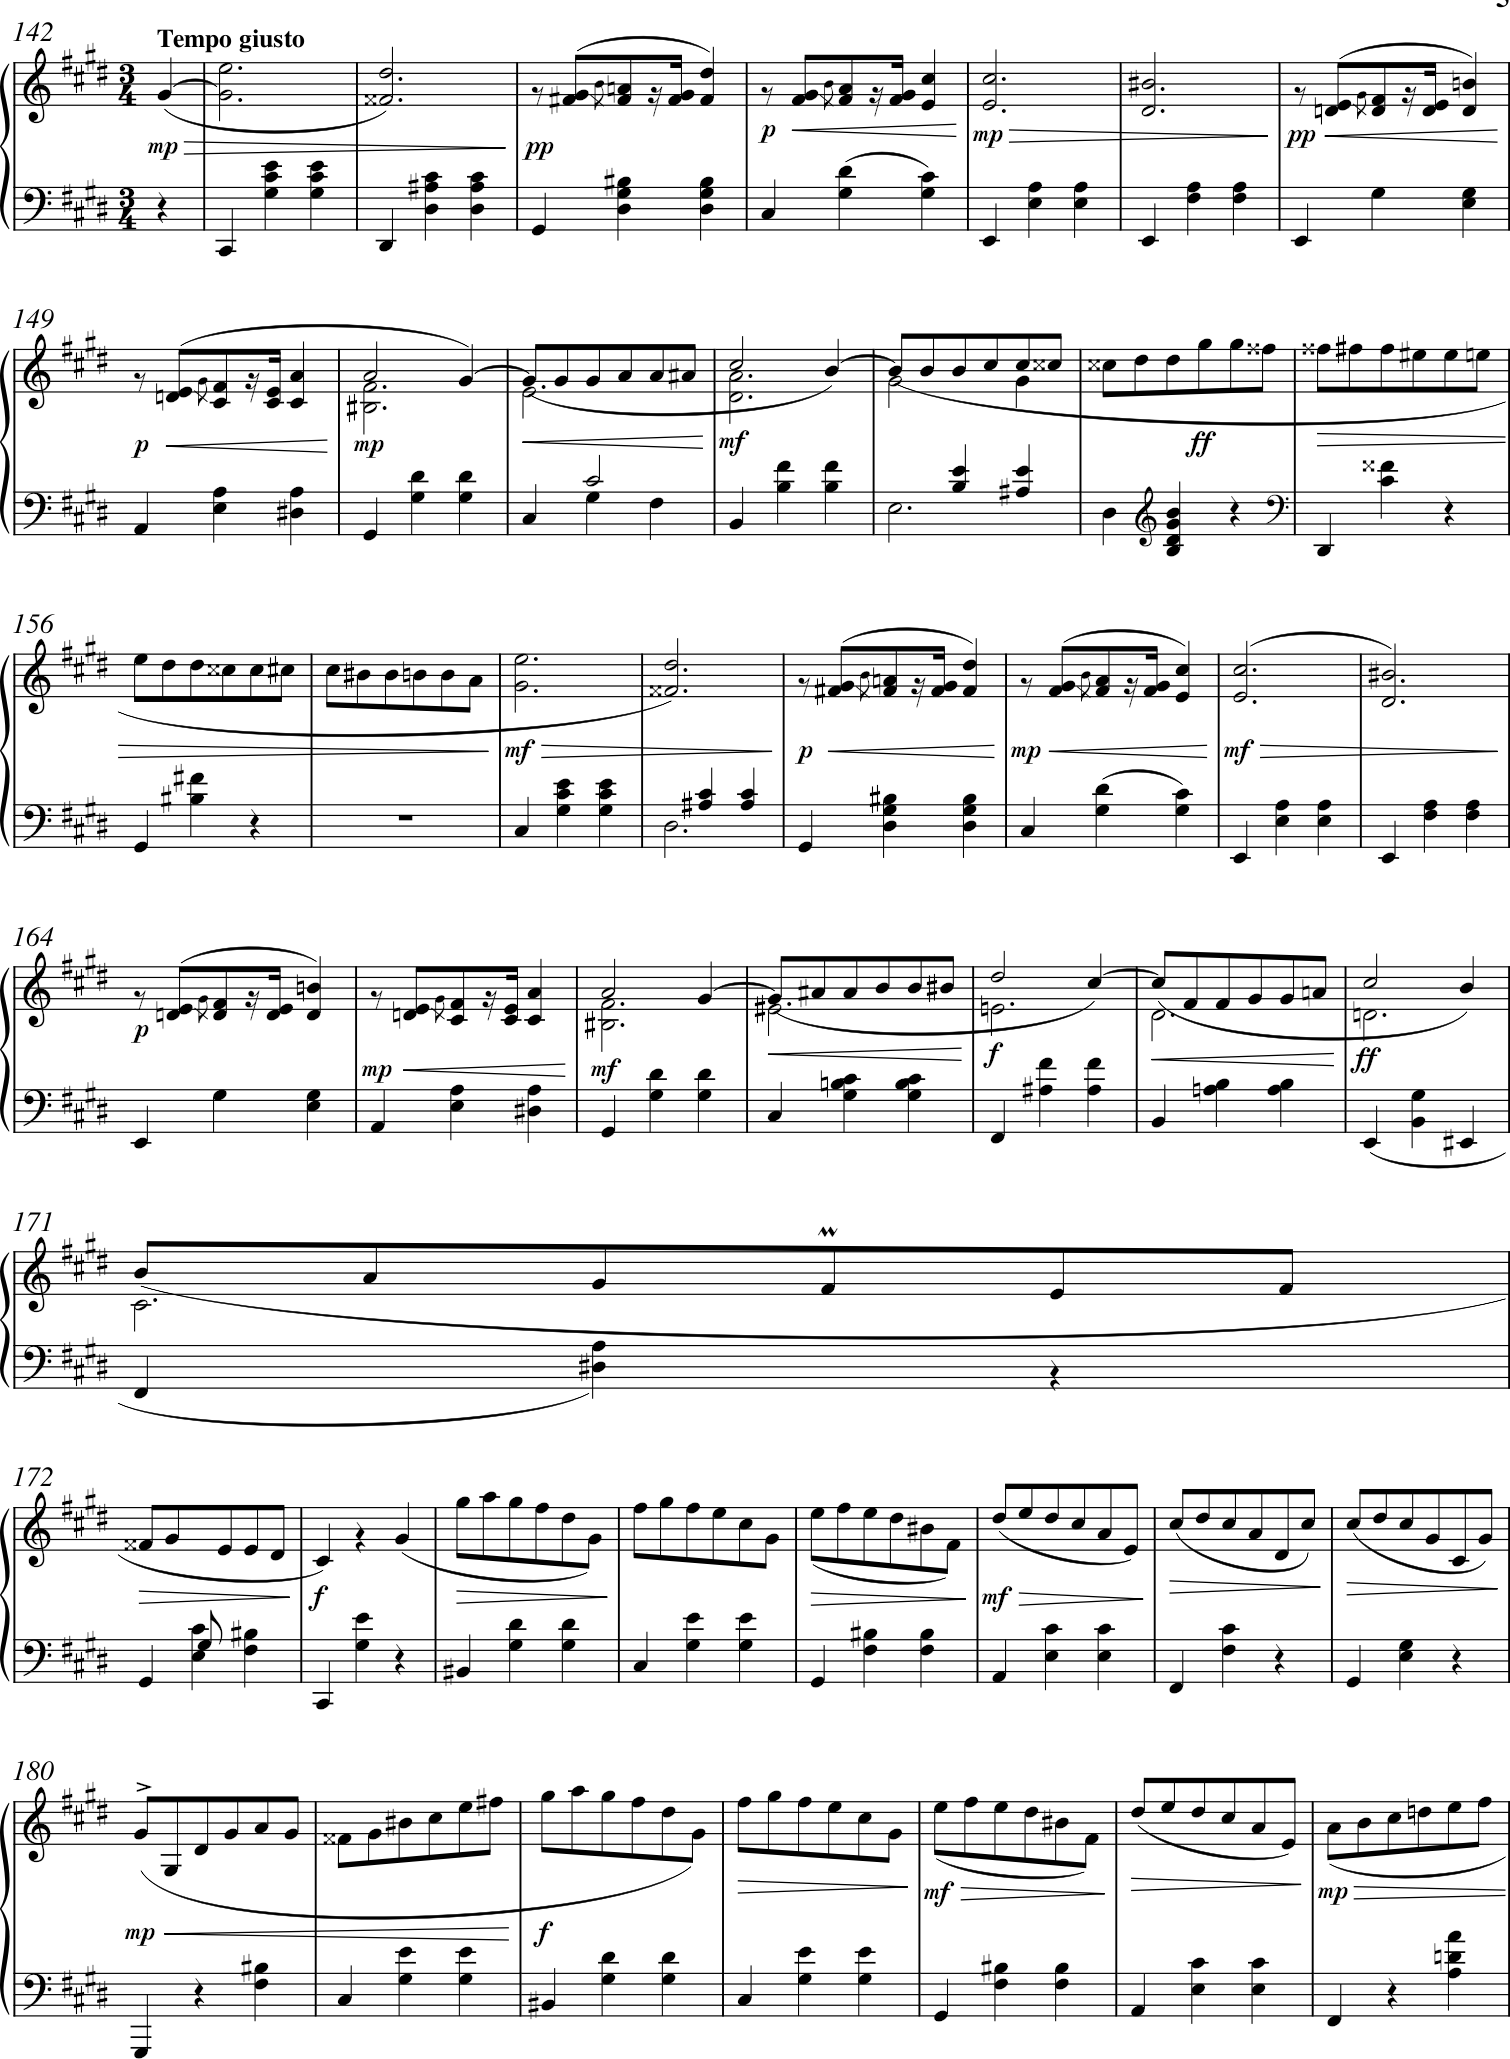

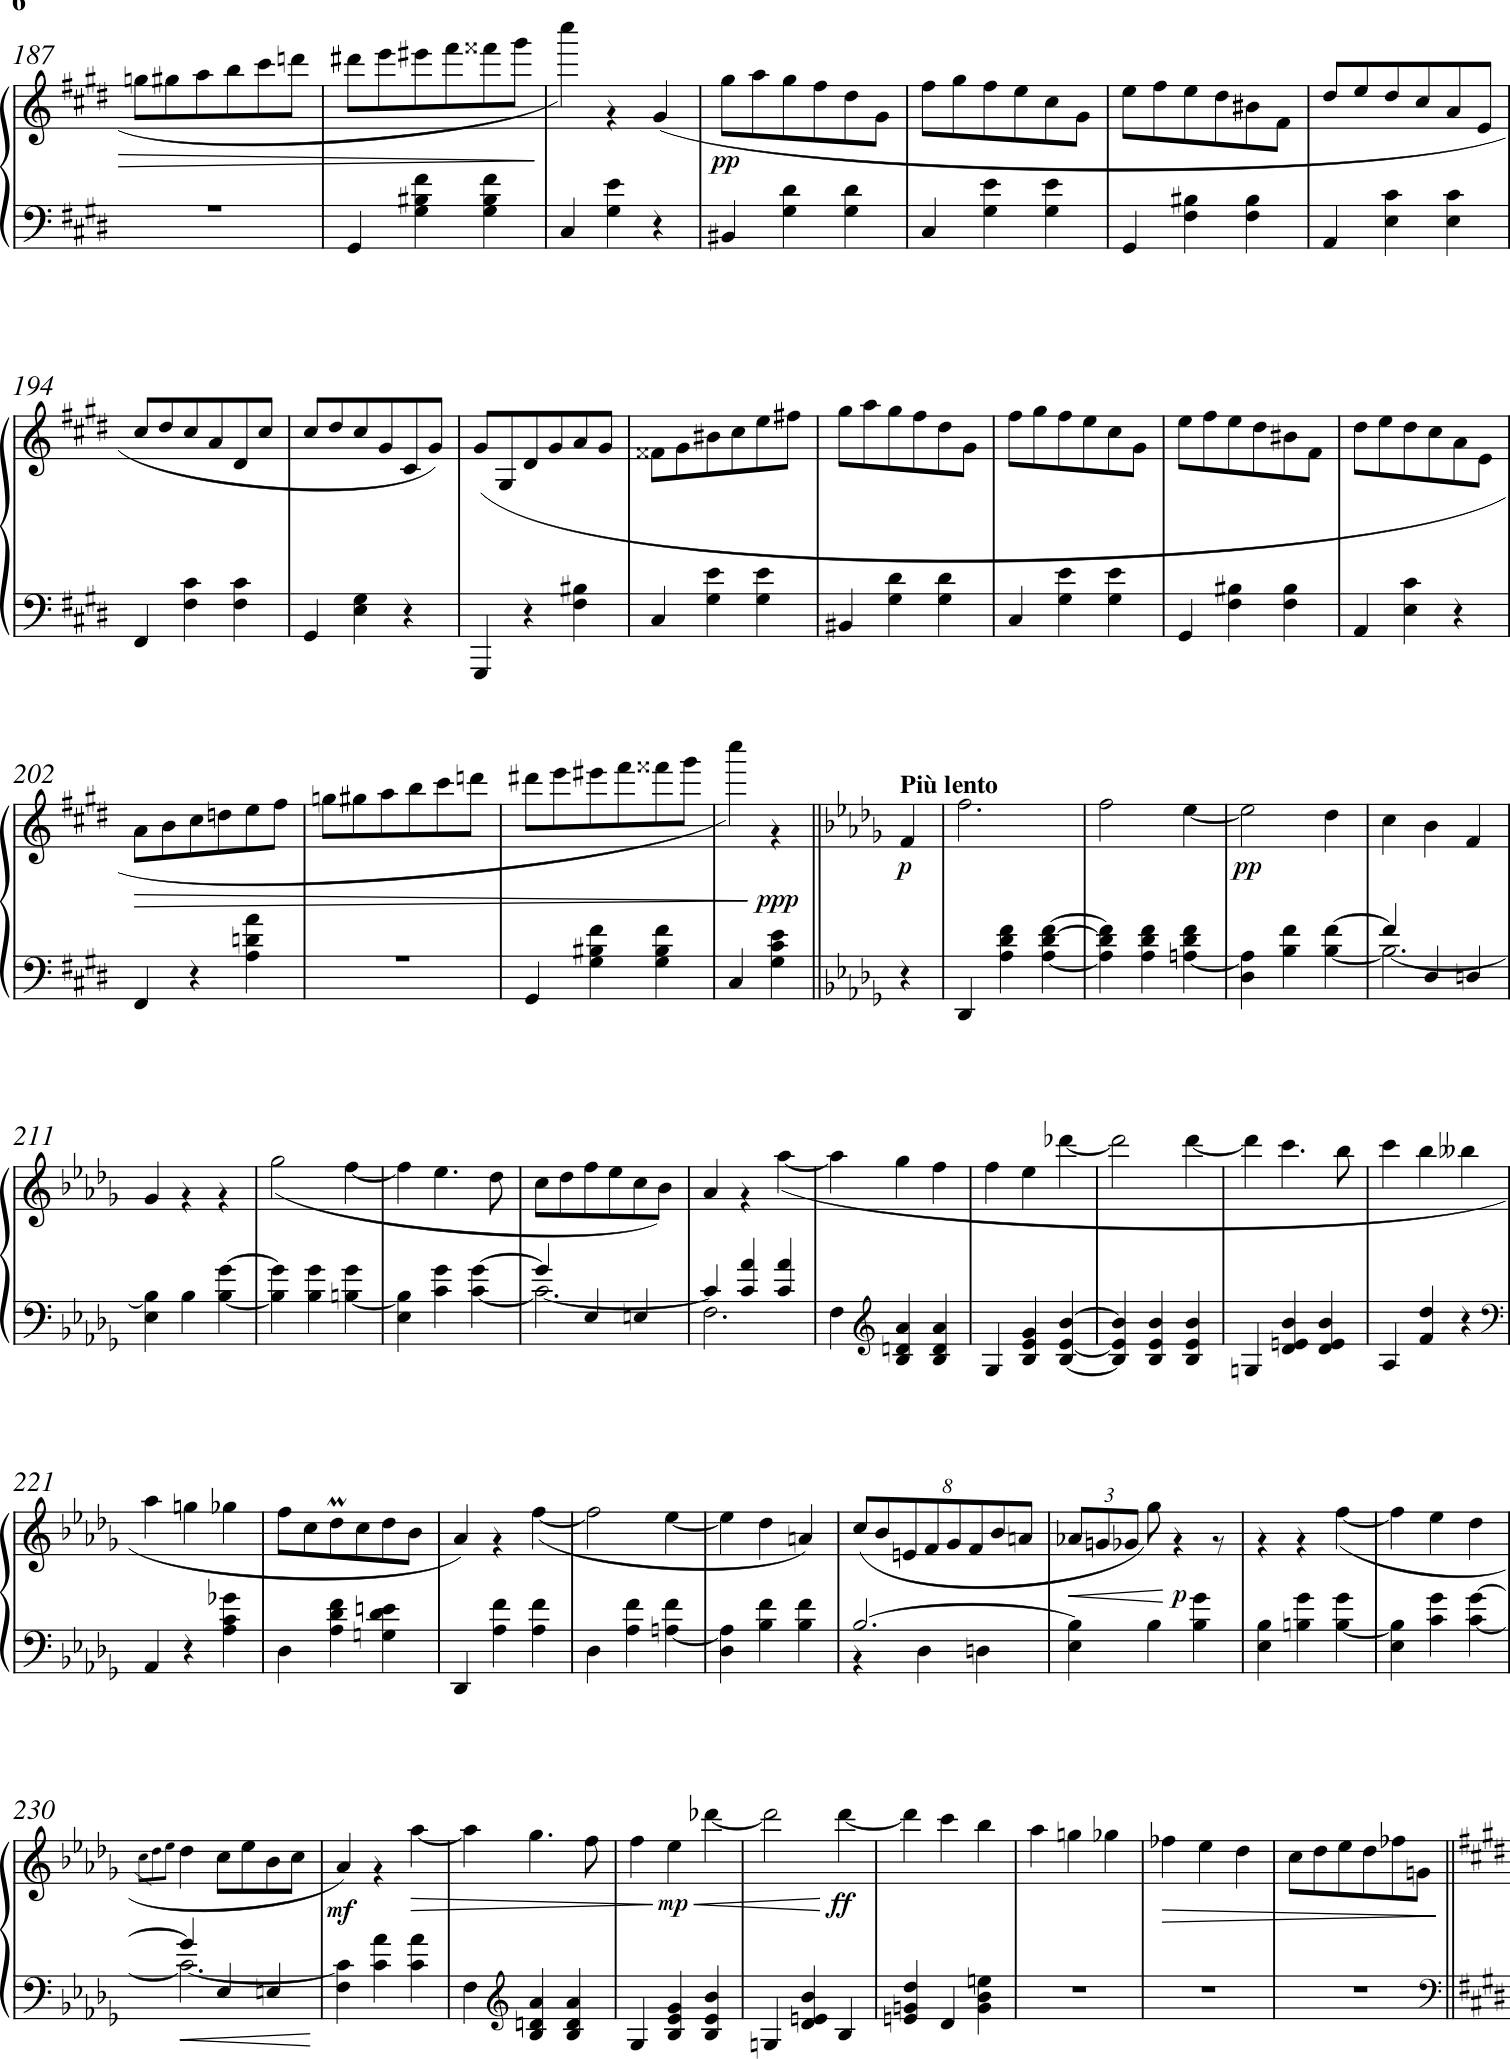

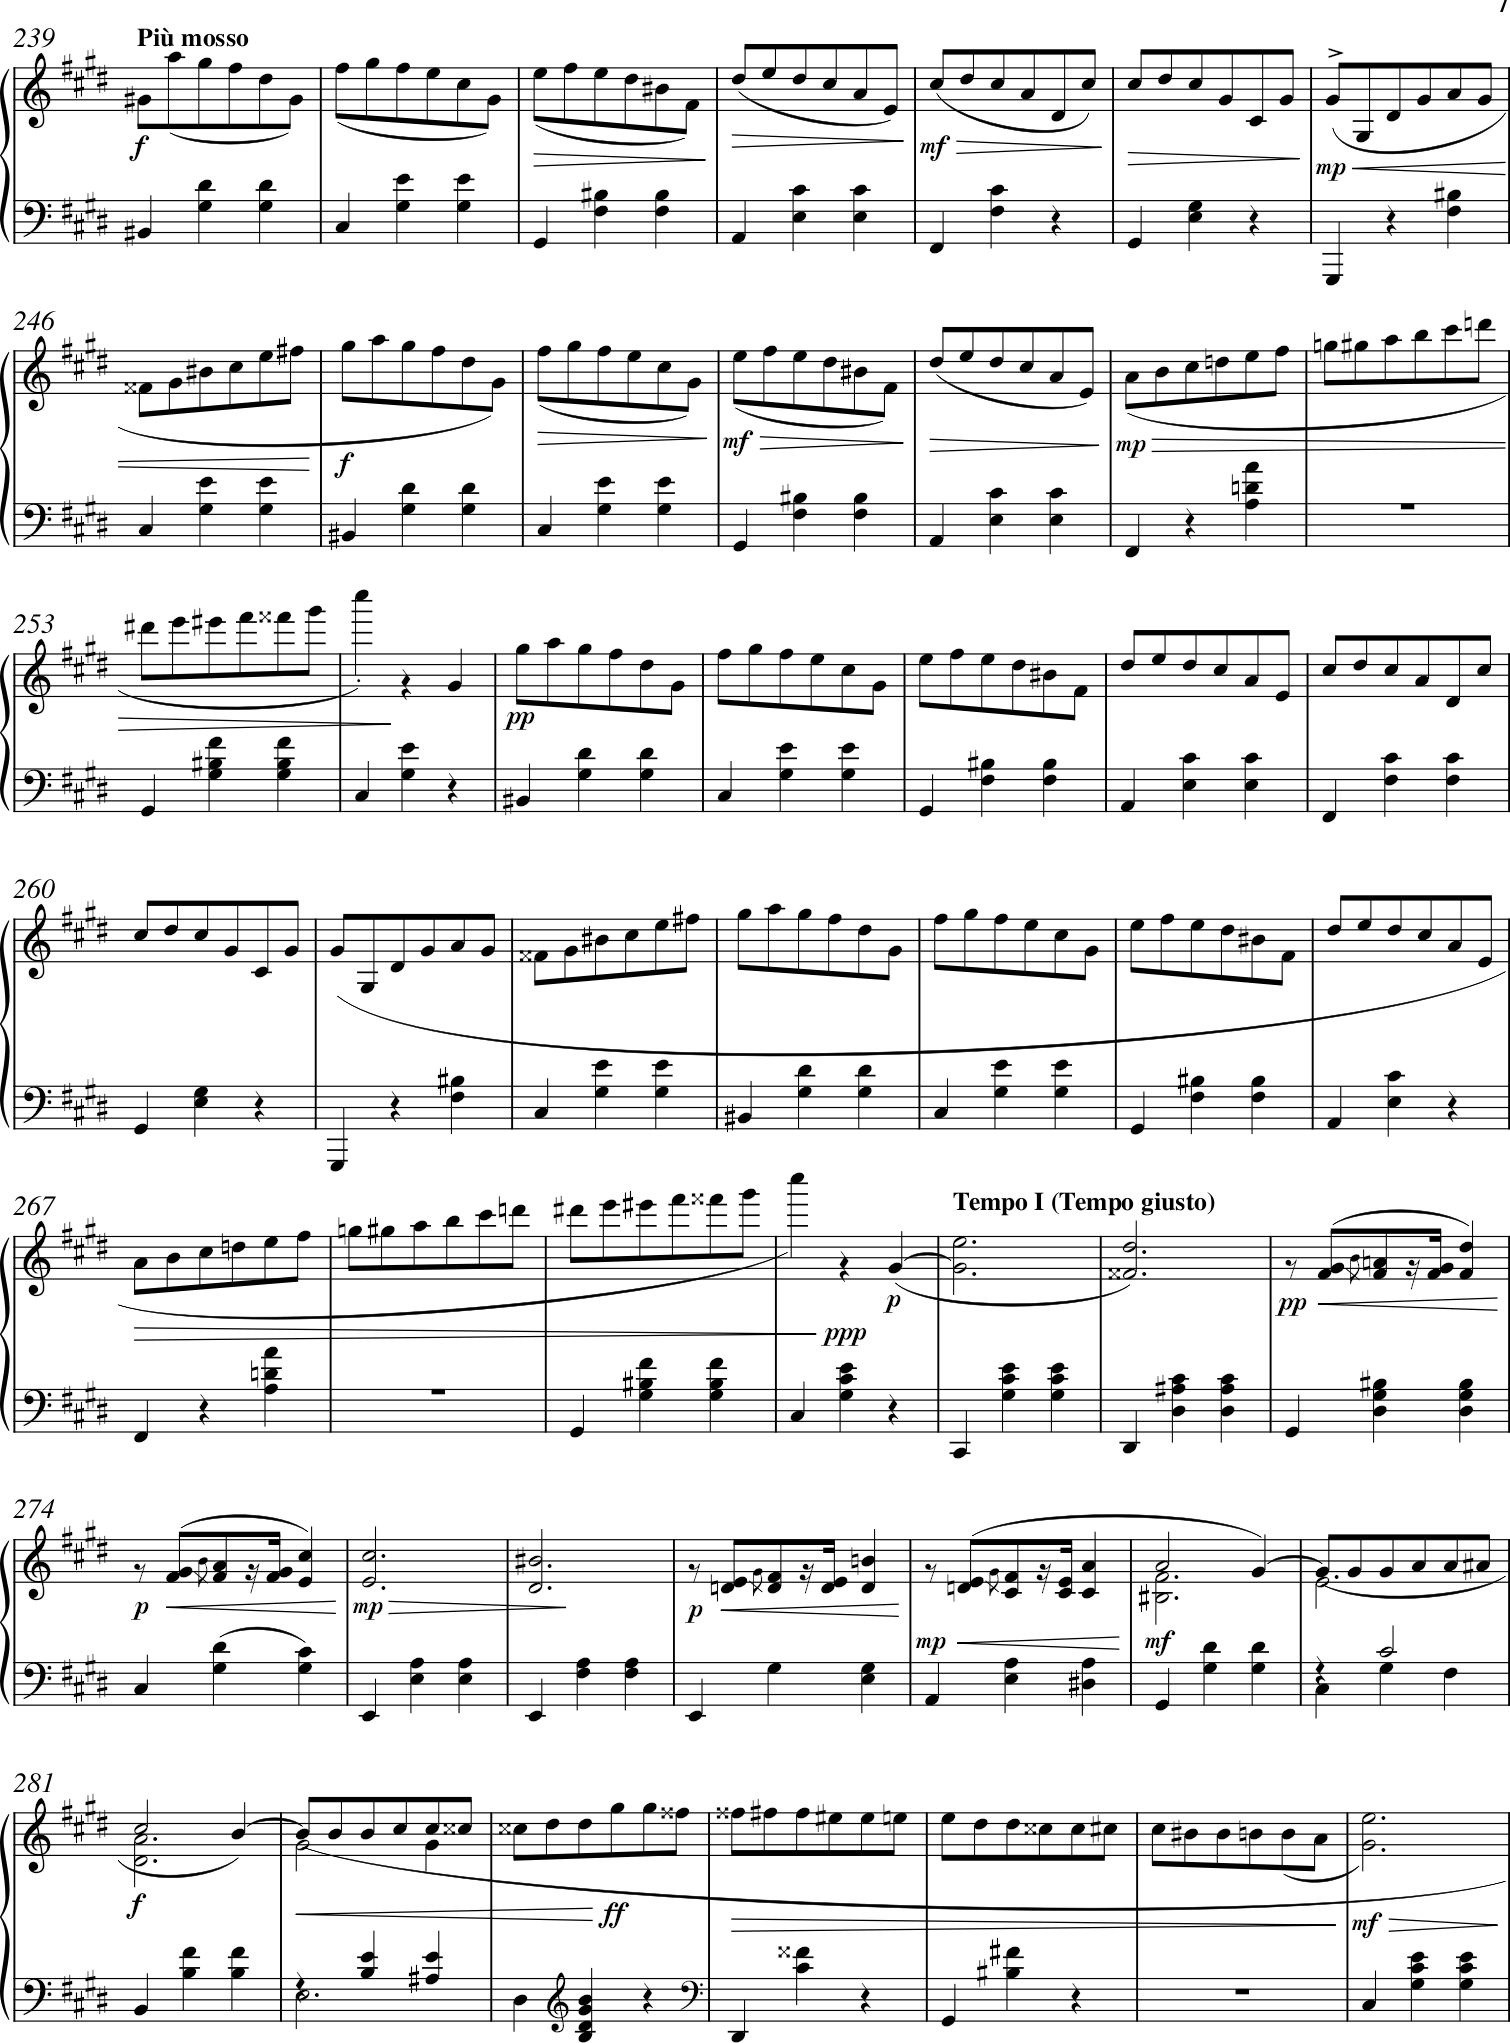

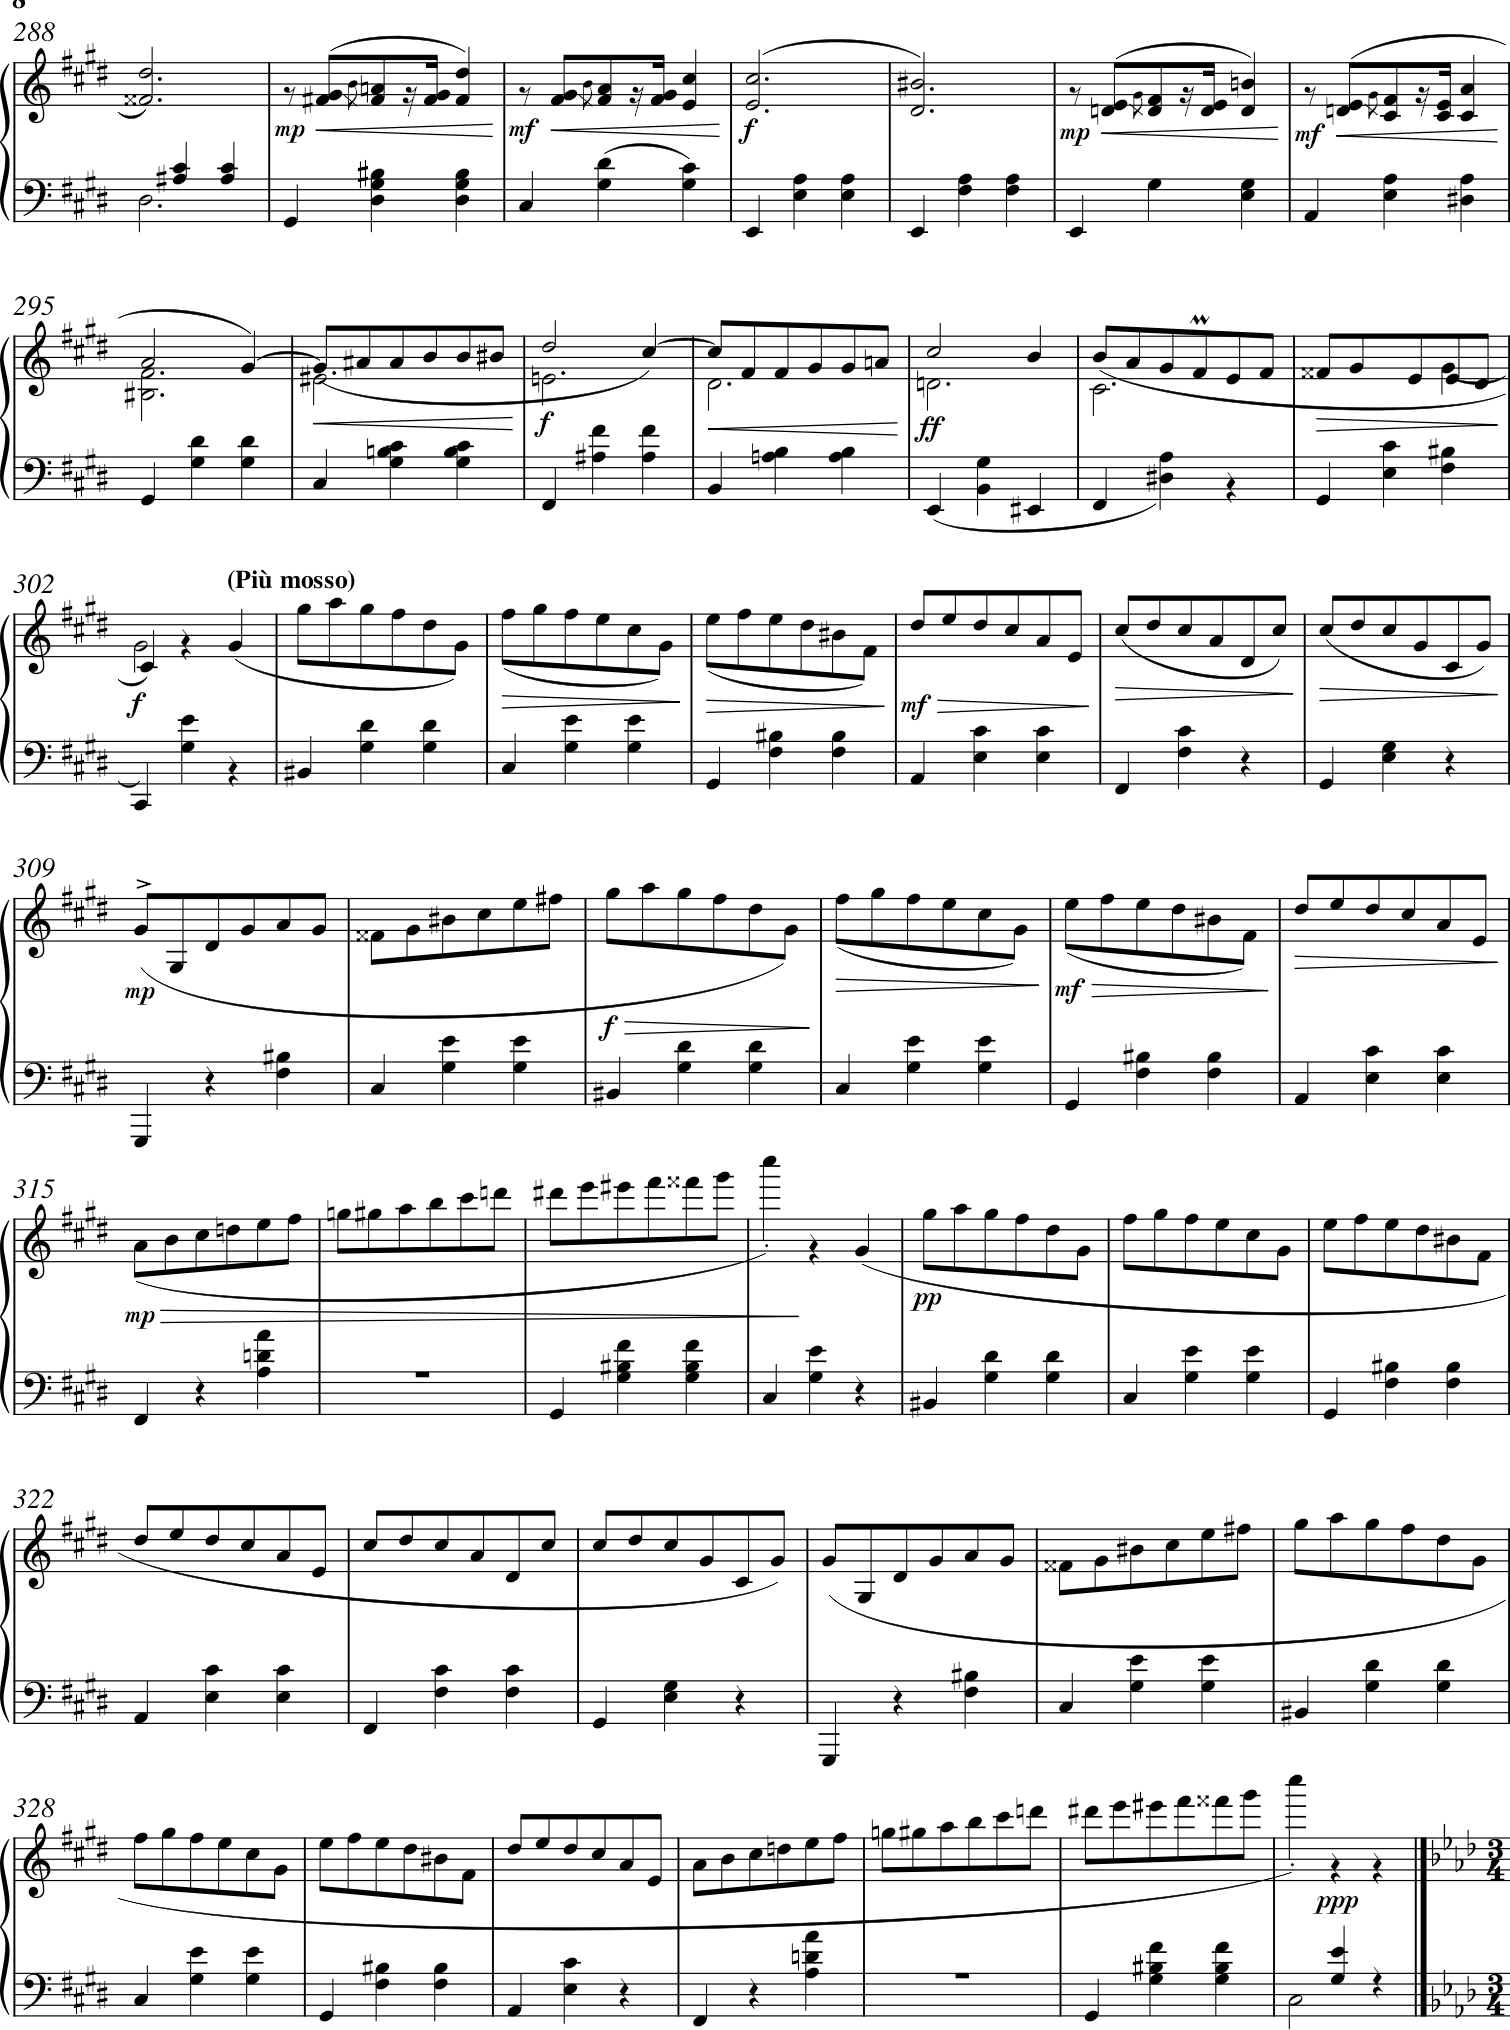

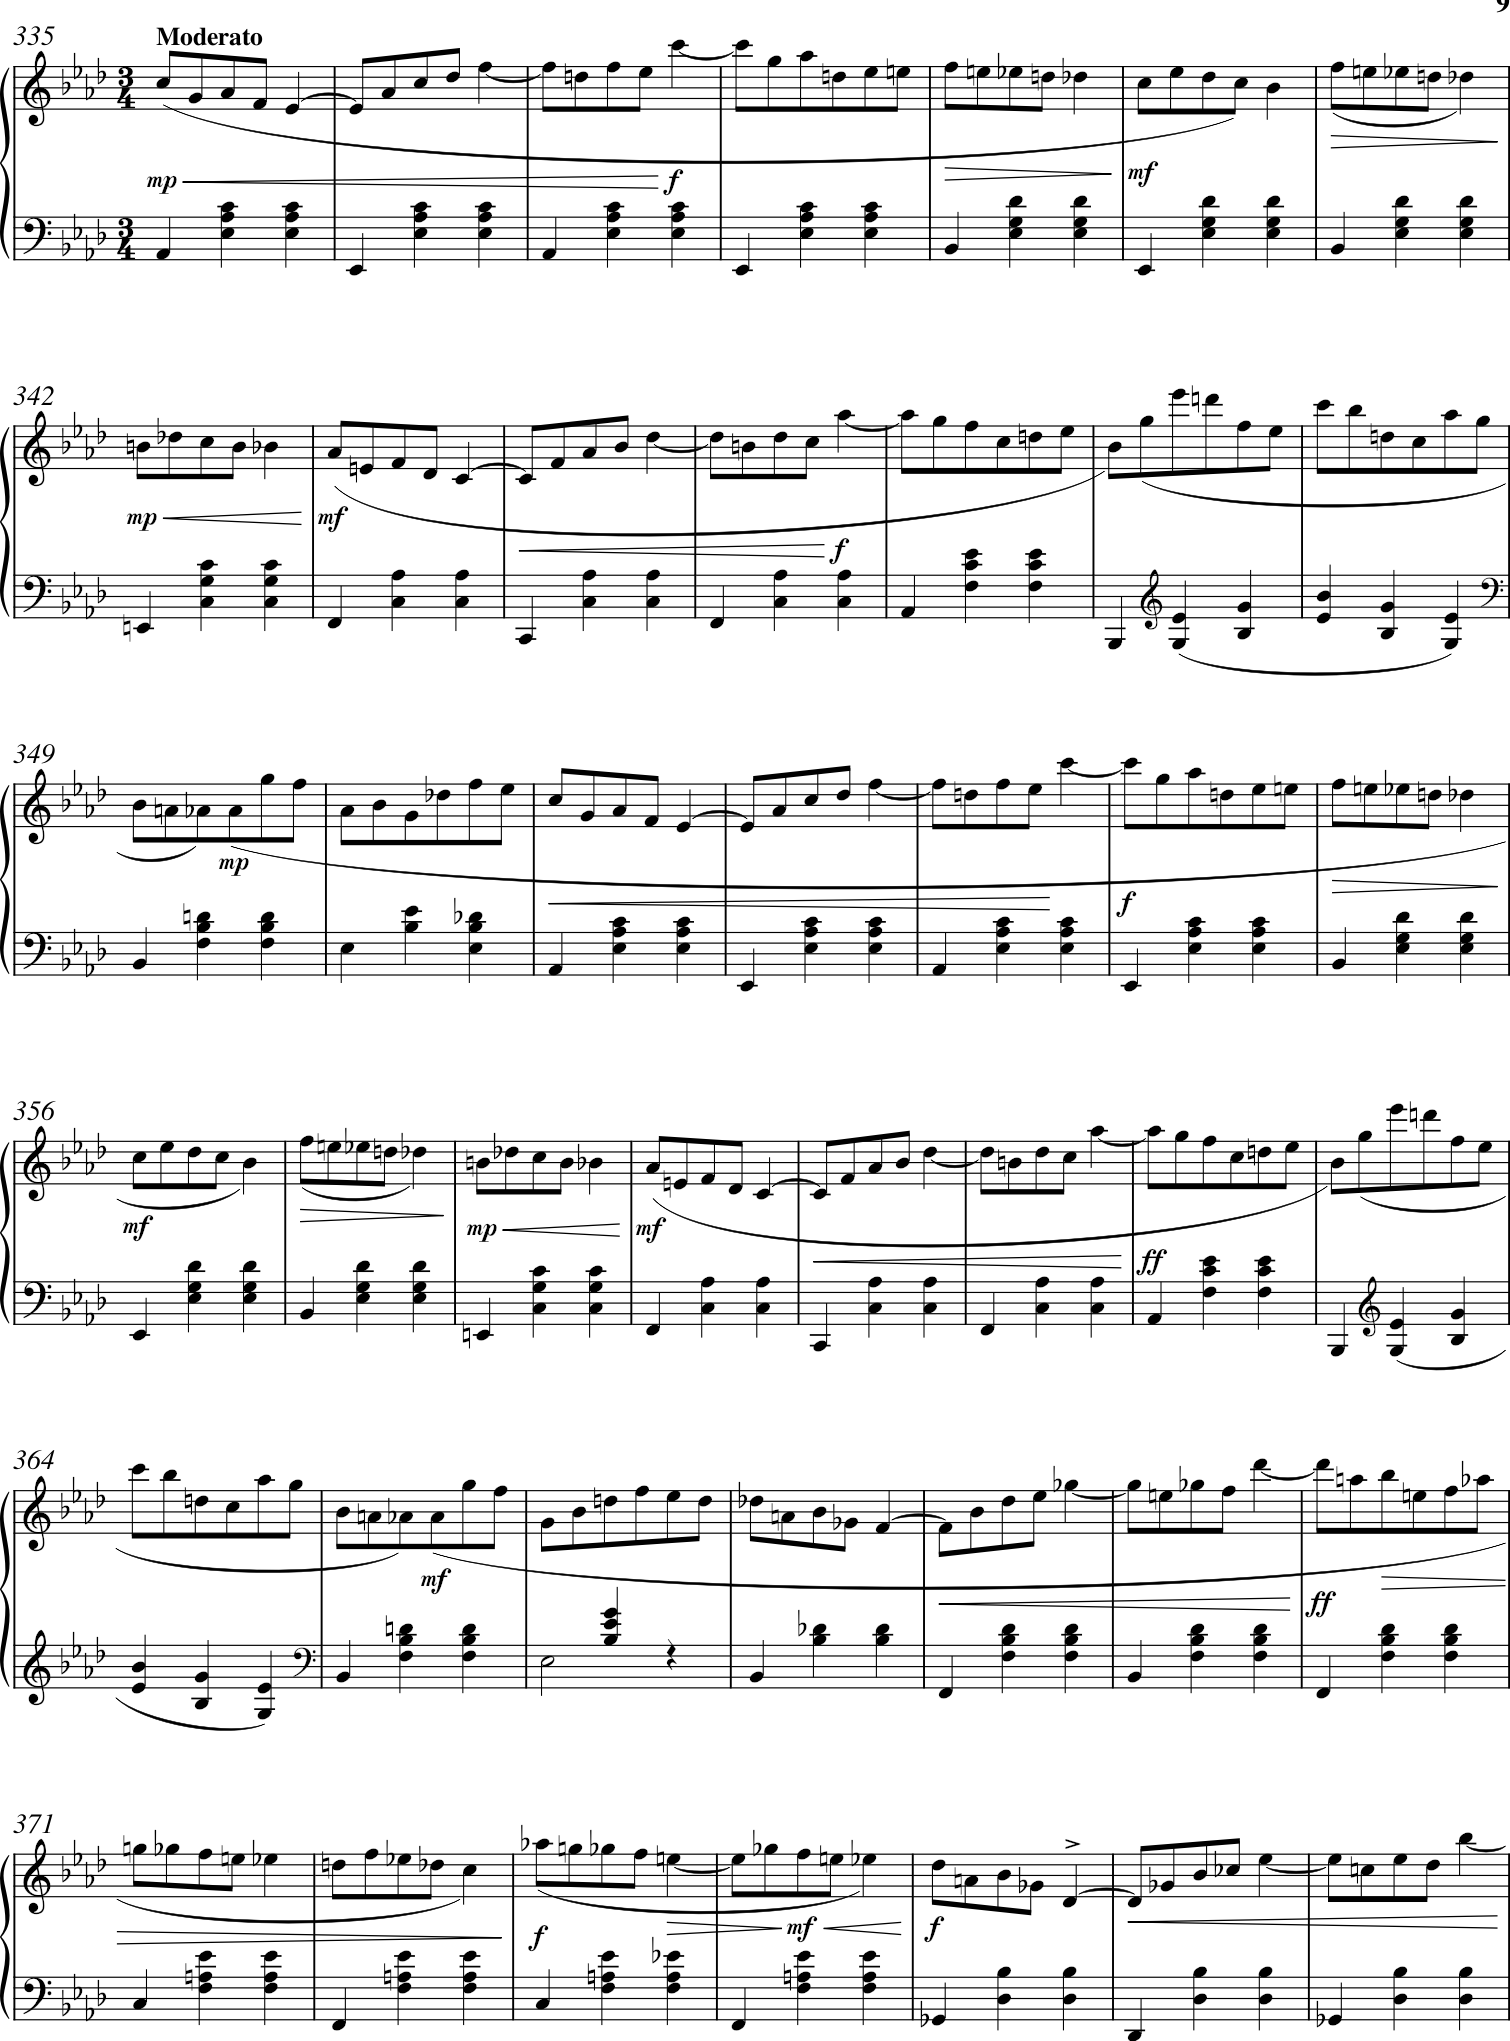

In [4]:
score.show()

In [8]:
score2.show('midi')

In [7]:
fp = score.write('midi', 'out.mid')

In [6]:
# score.show(fmt = 'musicxml')  
for a in score.flatten(): #lots of rests before chordify
    if type(a) == note.Rest:
        print(a)  

<music21.note.Rest dotted-half>
<music21.note.Rest dotted-half>
<music21.note.Rest dotted-half>
<music21.note.Rest dotted-half>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest quarter>
<music21.note.Rest half>
<music2

In [8]:

#find number of measures
beats = score.getTimeSignatures(recurse=False)[0].denominator

measures = int(score.highestTime / beats)
print(measures)
print(beats)

377
4


In [5]:
#chordify() makes score into only treble. (merges base into treble by making chords)
# Alternatively, can access the notes in each by doing score.part[index]

chords = score.chordify() 

In [10]:
length = chords.metronomeMarkBoundaries()[0][2].numberSounding #quarter notes per minute 
#Note, this up to offset 420.
qps = 60 / int(length) #quarter notes per second
print(length)
print(qps)

260
0.23076923076923078


In [11]:
chords.metronomeMarkBoundaries()

[(0.0, 420.0, <music21.tempo.MetronomeMark Quarter=260 (playback only)>),
 (420.0, 612.0, <music21.tempo.MetronomeMark Quarter=145 (playback only)>),
 (612.0, 709.0, <music21.tempo.MetronomeMark Quarter=130 (playback only)>),
 (709.0, 805.0, <music21.tempo.MetronomeMark Quarter=172 (playback only)>),
 (805.0, 900.0, <music21.tempo.MetronomeMark Quarter=145 (playback only)>),
 (900.0, 997.0, <music21.tempo.MetronomeMark Quarter=172 (playback only)>),
 (997.0, 1186.0, <music21.tempo.MetronomeMark Quarter=160 (playback only)>),
 (1186.0, 1442.0, <music21.tempo.MetronomeMark Quarter=145 (playback only)>),
 (1442.0, 1510.0, <music21.tempo.MetronomeMark Quarter=180 (playback only)>)]

In [12]:
#showing all of the notes in the score (1st column),
# along with their duration in beats (quarter note, eighth note, etc.),
# their duration in seconds (based on the BPM of the song),
# their frequency and their note name (should be directly correlated obviously),
# and the time in the song that they should be played (basically the sum of all the durations of the notes before).

#NOTE this generation method does not account for Rests. 
# This is because after calling chordify(), calling flatten() seems to ignore the rests

note_cnt = 1

dur_beats_list = []
dur_seconds_list = []
freq_list = []
name_list = []
start_time_list = []

for el in chords.flatten():
    #print(el)
    if (type(el) == chord.Chord):
        for my_note in el:
            #print(note)
            note_cnt += 1
            name = my_note.nameWithOctave
            freq = my_note.pitch.frequency
            dur_seconds = my_note.duration.quarterLength * qps
            dur_beats = my_note.duration.type
            start_time = el.offset * qps #in seconds
            
            dur_beats_list.append(dur_beats)
            dur_seconds_list.append(dur_seconds)
            name_list.append(name)
            freq_list.append(freq)
            start_time_list.append(start_time)
            
            #print(freq) #offset is number of quarter notes?
#print(note_cnt)

In [13]:
dict_temp = {'Duration in Beats': dur_beats_list, 'Duration in Seconds': dur_seconds_list, 'Name': name_list, 'Frequency': freq_list, 'Start Time in Seconds': start_time_list}
df = pd.DataFrame(data=dict_temp)
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df)
df

Duration in Beats  Duration in Seconds Name   Frequency  \
0              quarter             0.230769  A-4  415.304698   
1               eighth             0.115385   G4  391.995436   
2               eighth             0.115385  A-4  415.304698   
3               eighth             0.115385   C5  523.251131   
4               eighth             0.115385  B-4  466.163762   
...                ...                  ...  ...         ...   
7392            eighth             0.115385  A-4  415.304698   
7393            eighth             0.115385  E-4  311.126984   
7394            eighth             0.115385  A-3  207.652349   
7395            eighth             0.115385  E-3  155.563492   
7396              half             0.692308  A-1   51.913087   

      Start Time in Seconds  
0                  0.000000  
1                  0.230769  
2                  0.346154  
3                  0.461538  
4                  0.576923  
...                     ...  
7392             347.307692  
7393             347.423077  
7394             347.538462  
7395             347.653846  
7396             347.769231  

[7397 rows x 5 columns]

In [14]:
score.flatten()

<music21.stream.Score 0x13888401c90>

In [29]:
# This code generates a dataframe from score while also considering rests.
# This code is copied into a function below.

dur_beats_list = []
dur_seconds_list = []
freq_list = []
name_list = []
start_time_list = []


for measure in chords.getElementsByClass('Measure'):
    for n in measure.notesAndRests:
        if (type(n) == chord.Chord):
            
            for my_note in n:
                #print(note)
                name = my_note.nameWithOctave
                freq = my_note.pitch.frequency
                dur_seconds = my_note.duration.quarterLength * qps
                dur_beats = my_note.duration.type
                start_time = (measure.offset + n.offset) * qps #in seconds
                # note: This is calculated differently than above because the measure.offset gives the offset of the beginning of the measure.
                
                dur_beats_list.append(dur_beats)
                dur_seconds_list.append(dur_seconds)
                name_list.append(name)
                freq_list.append(freq)
                start_time_list.append(start_time)
        elif (type(n) == note.Rest):
            name = n.name
            freq = 0
            dur_seconds = n.duration.quarterLength * qps
            dur_beats = n.duration.type
            print(measure.offset)
            print(n.offset)
            start_time = (measure.offset + n.offset) * qps
            
            dur_beats_list.append(dur_beats)
            dur_seconds_list.append(dur_seconds)
            name_list.append(name)
            freq_list.append(freq)
            start_time_list.append(start_time)
        else:
            print(type(n))
        #print(n)

417.0
2.0
994.0
2.0


In [33]:
#Notice that the output length is larger by 2. This is because there are 2 rests in the piece.
dict_temp = {'Duration in Beats': dur_beats_list, 'Duration in Seconds': dur_seconds_list, 'Name': name_list, 'Frequency': freq_list, 'Start Time in Seconds': start_time_list}
df = pd.DataFrame(data=dict_temp)
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df)
df

Duration in Beats  Duration in Seconds Name   Frequency  \
0              quarter             0.230769  A-4  415.304698   
1               eighth             0.115385   G4  391.995436   
2               eighth             0.115385  A-4  415.304698   
3               eighth             0.115385   C5  523.251131   
4               eighth             0.115385  B-4  466.163762   
...                ...                  ...  ...         ...   
7394            eighth             0.115385  A-4  415.304698   
7395            eighth             0.115385  E-4  311.126984   
7396            eighth             0.115385  A-3  207.652349   
7397            eighth             0.115385  E-3  155.563492   
7398              half             0.692308  A-1   51.913087   

      Start Time in Seconds  
0                  0.000000  
1                  0.230769  
2                  0.346154  
3                  0.461538  
4                  0.576923  
...                     ...  
7394             347.307692  
7395             347.423077  
7396             347.538462  
7397             347.653846  
7398             347.769231  

[7399 rows x 5 columns]

In [7]:
# NOTE: This does not account for changing tempo (like the example does --> So it is wrong...) but it is not a hard fix.
#scoreToDataFrame accepts a music21 score and creates a pandas dataframe
#Returns the dataframe
def scoreToDataFrame(score):
    dur_beats_list = []
    dur_seconds_list = []
    freq_list = []
    name_list = []
    start_time_list = []

    length = chords.metronomeMarkBoundaries()[0][2].numberSounding #quarter notes per minute 
    #Note, this up to offset 420.
    qps = 60 / int(length) #quarter notes per second
    for measure in score.getElementsByClass('Measure'):
        for n in measure.notesAndRests:
            if (type(n) == chord.Chord):
                
                for my_note in n:
                    #print(note)
                    name = my_note.nameWithOctave
                    freq = my_note.pitch.frequency
                    dur_seconds = my_note.duration.quarterLength * qps #duration in seconds
                    dur_beats = my_note.duration.type #duration type
                    start_time = (measure.offset + n.offset) * qps #in seconds
                    # note: This is calculated differently than above because the measure.offset gives the offset of the beginning of the measure.
                    
                    dur_beats_list.append(dur_beats)
                    dur_seconds_list.append(dur_seconds)
                    name_list.append(name)
                    freq_list.append(freq)
                    start_time_list.append(start_time)
            elif (type(n) == note.Rest): #fills arrays if note type is a Rest
                name = n.name
                freq = 0
                dur_seconds = n.duration.quarterLength * qps
                dur_beats = n.duration.type
                start_time = (measure.offset + n.offset) * qps
                
                dur_beats_list.append(dur_beats)
                dur_seconds_list.append(dur_seconds)
                name_list.append(name)
                freq_list.append(freq)
                start_time_list.append(start_time)
            else:
                print(type(n))
    dict_temp = {'Duration in Beats': dur_beats_list, 'Duration in Seconds': dur_seconds_list, 'Name': name_list, 'Frequency': freq_list, 'Start Time in Seconds': start_time_list}
    df = pd.DataFrame(data=dict_temp)
    
    return df

In [17]:
chords

<music21.stream.PartStaff P1-Staff1>

In [8]:
scoreToDataFrame(chords)

Duration in Beats  Duration in Seconds Name   Frequency  \
0              quarter             0.230769  A-4  415.304698   
1               eighth             0.115385   G4  391.995436   
2               eighth             0.115385  A-4  415.304698   
3               eighth             0.115385   C5  523.251131   
4               eighth             0.115385  B-4  466.163762   
...                ...                  ...  ...         ...   
7394            eighth             0.115385  A-4  415.304698   
7395            eighth             0.115385  E-4  311.126984   
7396            eighth             0.115385  A-3  207.652349   
7397            eighth             0.115385  E-3  155.563492   
7398              half             0.692308  A-1   51.913087   

      Start Time in Seconds  
0                  0.000000  
1                  0.230769  
2                  0.346154  
3                  0.461538  
4                  0.576923  
...                     ...  
7394             347.307692  
7395             347.423077  
7396             347.538462  
7397             347.653846  
7398             347.769231  

[7399 rows x 5 columns]

In [17]:
# s = b
# sChords = s.chordify()
# sFlat = sChords.flatten()
# sOnlyChords = sFlat.getElementsByClass('Chord')
# displayPart = stream.Part(id='displayPart')
# for i in range(0, len(sOnlyChords) - 1):
#     thisChord = sOnlyChords[i]
#     nextChord = sOnlyChords[i + 1]
# for m in sChords.getElementsByClass('Measure'):
#     k = m.analyze('key')
#     print(m.number, k)

In [18]:
length = score.metronomeMarkBoundaries()[0][2].numberSounding
#length = 60 / int(length)
length

260

In [8]:
import numpy as np
def func(a: np.ndarray):
    print('yay')

In [9]:
func(123)

yay
